# Домашнее задание №2

Задание присылать на обе почты почты aleksartamonov@gmail.com dashkov.alexander.om@gmail.com в виде ссылки на colab

В теме письма указать **CV_HSE_2021 HW1 <Фамилия Имя>**

soft deadline: 14.03.2021T23:59:00+0300

hard deadline: 21.03.2021T23:59:00+0300

In [ ]:
import cv2
import matplotlib.pylab as plt
import numpy as np 
import ipywidgets as widgets
from scipy import fftpack
from itertools import combinations, combinations_with_replacement
from typing import Tuple
from copy import deepcopy
from ipywidgets import interact
from IPython.display import display
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

lena = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV/hw2/lena.jpg")
lena_diagonal = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CV/hw2/lena_diagonal.jpg')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


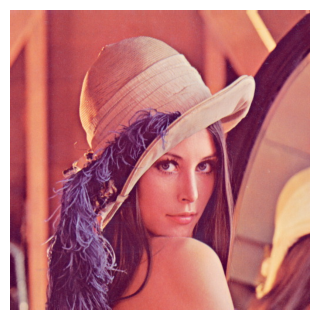

In [4]:
%matplotlib inline
plt.style.use('default')

def show(img, size=3):
    plt.figure(figsize=(size,size))
    ax = plt.axes([0,0,1,1], frameon=False)
    ax.set_axis_off()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
show(lena)

**1. (6 баллов)** С помощью [виджетов](http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) создайте 2 слайдера с настройками параметров гамма-коррекции. Отобразите **lena**, ее гамма-преобразование и график в диапозоне от [0;1], так, чтобы параметры слайдера соответствовали параметрам гамма-коррекции. 

In [ ]:
def plot(c, gamma):
    plt.figure(figsize=(5.7,4))
    plt.title('y = c * x^gamma')
    X = np.linspace(0, 1, 50)
    y = [(c * (x ** gamma)) for x in X]
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(X, y, c="black")
    plt.show()

def GammaCorrection(c, gamma):
    cv2_imshow(np.power(c * lena, gamma))
    plot(c, gamma)
    return 

c=widgets.FloatSlider(min=0, max=2, step=0.1)
gamma=widgets.FloatSlider(min=0, max=2, step=0.1)

interact(GammaCorrection,c=c, gamma=gamma)


interactive(children=(FloatSlider(value=0.0, description='c', max=2.0), FloatSlider(value=0.0, description='ga…

<function __main__.GammaCorrection>

**2. (5 баллов)** Загрузите изображение $lena.jpg$. Переведите изображение в градации серого. Примените к серому изображению операцию линейного растяжения диапазона яркостей ($normalize$) и эквализации гистограммы ($equalizeHist$). Постройте разность полученных результатов. Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности.

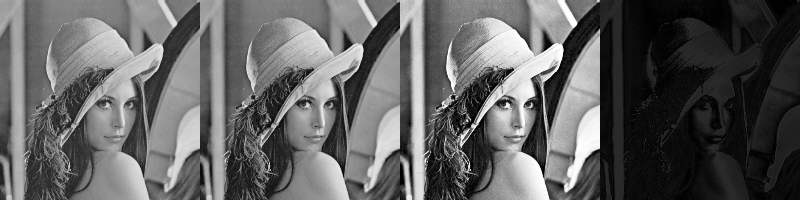

In [ ]:
lena_gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
lena_normalized = cv2.normalize(lena_gray, None, alpha=0, beta=256, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
lena_equalize = cv2.equalizeHist(lena_gray)
lena_diff = cv2.absdiff(lena_normalized.astype(np.float32), lena_equalize.astype(np.float32))
resize = lambda image: cv2.resize(image,(200,200))
lenas = [lena_gray, lena_normalized, lena_equalize, lena_diff]
lenas_200 = [resize(image) for image in lenas]
collage = np.hstack(lenas_200)
cv2_imshow(collage)

**3. (5 баллов)** Реализуйте функцию добавления шума «соль и перец» для одноканального изображения. Входные параметры: $src$ – исходная одноканальная матрица $Mat$, $p$ – вероятность замещения исходных значений на $0$, $q$ – вероятность замещения исходных значений на $255$. Загрузите изображение $lena.jpg$, выделите каналы изображения в отдельные матрицы ($split$), добавьте шум «соль и перец» в каждый канал при помощи реализованной Вами функции с параметрами

1. $p=q=0.05$
2. $p=q=0.1$
3. $p=q=0.15$

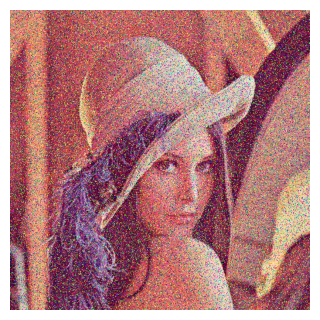

In [ ]:
def salt_pepper(src, p, q):
    total_cells = 512 * 512
    src = src.astype(np.float32)
    pairs = list(combinations(range(512), 2))
    pairs += [tuple(reversed(pair)) for pair in pairs]
    pairs_size = len(pairs)
    to_change = int(p * total_cells)
    # replace with 0
    SaltMask = np.random.choice(pairs_size, to_change, replace=False)
    for i in SaltMask:
        x, y = pairs[i]
        src[x, y] = 0
    # replace with 255
    PepperMask = np.random.choice(pairs_size, to_change, replace=False)
    for j in PepperMask:
        x, y = pairs[j]
        src[x, y] = 255
    return src.astype(np.uint8)

Channel1, Channel2, Channel3 = cv2.split(lena)

Channel1 = salt_pepper(Channel1, p=0.05, q=0.05)
Channel2 = salt_pepper(Channel2, p=0.1, q=0.1)
Channel3 = salt_pepper(Channel3, p=0.15, q=0.15)

salted_lena = cv2.merge([Channel1, Channel2, Channel3])
show(salted_lena)

**4. (5 баллов)** Удалите диагональные полоски с изображения $lena\_diagonal.jpg$. Вычислите среднеквадратичную ошибку (mean squared error, $MSE$) для полученного результата и изображения $lena\_gray\_512.tif$. Задача будет засчитана при $MSE < 1500$. Тот, у кого по результатам проверки будет наименьшее значение MSE среди всех студентов для этой задачи, получит призовую шоколадку (раньше мы раздавали призовые баллы, но теперь у нас концепция фиксированного максимального количества баллов)

mse: 937.2919921875


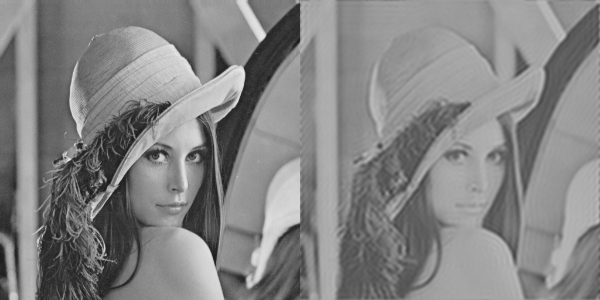

In [ ]:
GrayDiagonalLena = np.float32(cv2.cvtColor(np.array(lena_diagonal), cv2.COLOR_BGR2GRAY))
# fourier
lena_fft = fftpack.fft2(GrayDiagonalLena)
keep_fraction = 0.1
lena_fft2 = deepcopy(lena_fft) 
r, c = lena_fft2.shape
lena_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
lena_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

# inverse fourier
NoDiagonalLena = fftpack.ifft2(lena_fft2).real

# mse
NoDiagonalLena = np.float32(cv2.cvtColor(np.array(NoDiagonalLena), cv2.COLOR_GRAY2BGR))
LenaGray = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV/hw2/lena_gray_512.tif")
print(f'mse: {((np.square(LenaGray - NoDiagonalLena)).mean())}')

# show
resize = lambda image: cv2.resize(image,(300,300))
lenas = [resize(LenaGray), resize(NoDiagonalLena)]
collage = np.hstack(lenas)
cv2_imshow(collage)

**5. (5 баллов)** Подавите шум на изображении $lena\_color\_512\_noise.tif$. Вычислите среднеквадратичную ошибку ($MSE$) для полученного результата и изображения $lena\_color\_512.tif$. Задача будет засчитана при $MSE < 150$. Тот, у кого по результатам проверки будет наименьшее значение $MSE$ среди всех студентов для этой задачи, получит призовую шоколадку.

mse: 102.72857666015625


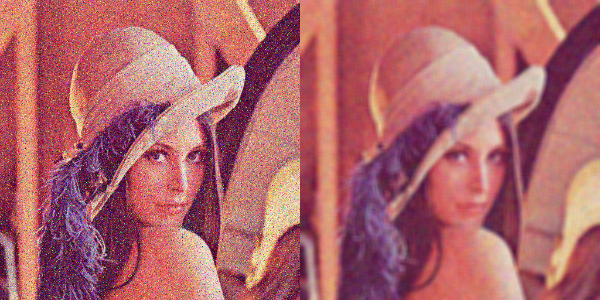

In [ ]:
LenaNoise = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV/hw2/lena_color_512-noise.tif")
Channel1, Channel2, Channel3 = cv2.split(LenaNoise)

size = (10, 10) 
Channel1, Channel2, Channel3 = cv2.blur(Channel1, size), cv2.blur(Channel2, size), cv2.blur(Channel3, size)

LenaBlur = cv2.merge([Channel1, Channel2, Channel3])
print(f'mse: {((np.square(LenaNoise - LenaBlur)).mean())}')

resize = lambda image: cv2.resize(image,(300,300))
lenas = [resize(LenaNoise), resize(LenaBlur)]
collage = np.hstack(lenas)
cv2_imshow(collage)

**6. (5 баллов)** Выделите в изображении $table.jpg$ границы таблицы с использованием морфологических операций. Результатом обработки должно быть изображение, в котором удален весь текст и оставлены только границы таблицы

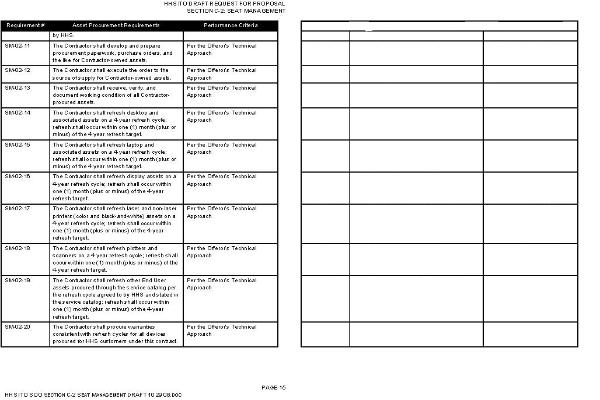

In [125]:
table = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV/hw2/table.jpg") 
gray_table = cv2.cvtColor(table, cv2.COLOR_BGR2GRAY)

gray = cv2.bitwise_not(gray_table)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, -85)                     

# detact vertical lines
vertical = deepcopy(thresh)
vertical_size = int(vertical.shape[0] / 10)
verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, vertical_size))
vertical = cv2.erode(vertical, verticalStructure)
vertical = cv2.dilate(vertical, verticalStructure)

# detact horizontal lines
horizontal = deepcopy(thresh)
horizontal_size = int(horizontal.shape[1] / 10)
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.dilate(horizontal, horizontalStructure)

# empty table from text
text_extraxted = cv2.subtract(gray, vertical + horizontal)
table_extraxted = cv2.absdiff(gray, text_extraxted)
table_extraxted = cv2.bitwise_not(table_extraxted)

resize = lambda image: cv2.resize(image,(300,400))
tabels = [resize(gray_table), resize(table_extraxted)]
collage = np.hstack(tabels)
cv2_imshow(collage)

**7. (5 баллов)** Отделите монеты от фона на изображении $coins\_1.jpg$, отсортируйте монеты по убыванию размера. Сгенерируйте результирующее изображение с цветной разметкой областей, соответствующих монетам на исходном изображении: на черном фоне должны быть выделены разными цветами области, соответствующие монетам. В центре каждой выделенной области разместите порядковый номер монеты в соответствии с сортировкой монет по размеру (в центре области, соответствующей самой большой монете, должно стоять число 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


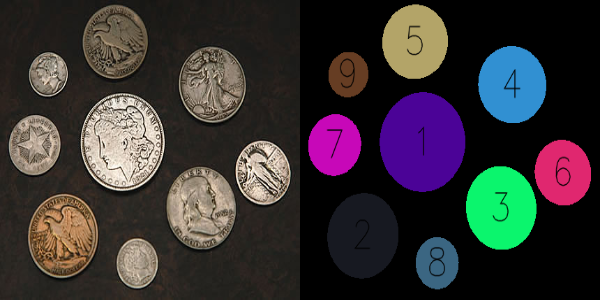

In [260]:
coins_1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV/hw2/coins_1.jpg")
coins_gray = cv2.cvtColor(coins_1, cv2.COLOR_BGR2GRAY)
coins_gray = cv2.GaussianBlur(coins_gray, (5, 5), 0)


def put_number(output):
    f2 = lambda arr, i: tuple(np.array(circles[i][0], dtype=int) + [-15,15])
    f1 = lambda arr, i, tpl: (cv2.putText(arr, str(i+1), tpl, 
                                          cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), lineType=cv2.LINE_AA))
    
    tpls_outputs = [f2(output, i) for i in range(n)]
    [f1(output, i, tpls_outputs[i]) for i in range(n)]


# detact coins
output = np.zeros_like(coins_1, dtype = 'uint8')
ret, thresh = cv2.threshold(coins_gray, 50, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
circles = np.array([cv2.fitEllipse(cnt) for cnt in contours if len(cnt) > 50])
indeces = np.argsort(list(map(lambda x: np.product(x), circles[:, 1])))[::-1]
circles = circles[indeces]


# put colors
n = len(circles)
for i in range(n):
    color = tuple(map(int, np.random.randint(0, 255, 3)))  
    cv2.ellipse(output, tuple(circles[i]), color, -1)


coins = cv2.addWeighted(coins_1, 0.3, output, 0.7, 0)
put_number(output)


resize = lambda image: cv2.resize(image,(300,300))
colored_coins = [resize(coins_1), resize(output)]
collage = np.hstack(colored_coins)
cv2_imshow(collage)

**8. (5 баллов)** Отделите монеты от текста на изображении $coins\_2.jpg.$ Сгенерируйте по входному изображению два изображения: на одном должны остаться только монеты, весь текст должен быть удален; на втором изображении должен остаться только текст, все монеты должны быть удалены.

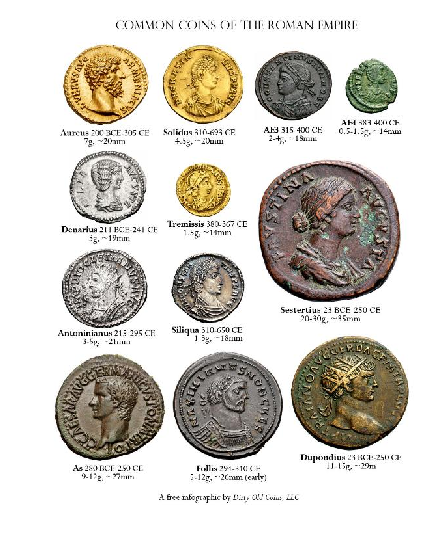

In [ ]:
coins_2 = cv2.imread("coins_2.jpg")
show(coins_2, size=7)

### Сравнение глобальных признаков 

Для задач 9 и 10 надо реализовать общую функцию, которая принимет на вход:

* список дескрипторов (**id**, и сам дескриптор) 
* количество максимально похожих для вывода **n**
* функцию сранения дескрипторов

и отдает **n** пар **id** максимально похожих изображений.

**9. (9 баллов)** Посмотрите на изображения в папке *Coral*. Посчитайте гистограммы изображений.  В этом задании надо попробовать:
* различные цветовые пространства (RGB, HSV, CIELab)
* различные способы разбиения на бины (разное количество для каждой характеристики)
* различные метрики сравнения $L_2$, $\chi^2$, пересечение гистограм

В итоге нужно сделать мини отчет по тому, какой метод раотает лучше. И в конце выведите на экран 20 пар изображений с максимально похожими гистограммами, которые получаются этим методом.

**10. (10 баллов)** Посмотрите на изображения в папке *leaves*. Посчитайте дескрипторы Фурье для каждого листочка изображений. Выведите на экран 20 пар изображений с максимально похожими дескрипторами.